<a href="https://colab.research.google.com/github/fonslucens/test_deeplearning/blob/master/reuter_LSTM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.reuters.load_data(num_words=10000)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


((8982,), (8982,), (2246,), (2246,))

In [3]:
print(y_train[50], x_train[50])

4 [1, 1479, 1197, 71, 8, 25, 1479, 1197, 640, 71, 304, 471, 80, 9, 1379, 1901, 4530, 6797, 79, 5, 8144, 71, 175, 80, 58, 4, 1279, 5, 63, 32, 20, 5, 4, 326, 175, 80, 335, 7, 10, 845, 31, 4, 221, 9, 108, 259, 1479, 1197, 640, 8, 16, 600, 69, 68, 11, 15, 6, 8144, 21, 397, 321, 6, 438, 1761, 3072, 79, 5, 8144, 1040, 894, 1051, 617, 80, 4, 617, 80, 23, 1051, 172, 3814, 3206, 8144, 175, 79, 9, 1379, 6, 264, 395, 3814, 3206, 79, 1479, 1197, 9, 25, 323, 8, 4, 8144, 80, 23, 381, 43, 42, 205, 50, 77, 33, 909, 9, 3509, 22, 216, 6, 216, 17, 12]


In [4]:
len(x_train[50]), len(x_train[400]), len(x_train[200])

(118, 90, 212)

In [5]:
pad_x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=500)
len(pad_x_train[50])

500

In [6]:
import numpy as np

In [7]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

# make model

In [8]:
model = tf.keras.models.Sequential()

In [9]:
model.add(tf.keras.layers.Embedding(input_length=500, input_dim=10000, output_dim=24))   # input layer
model.add(tf.keras.layers.LSTM(24, return_sequences=True, activation='tanh'))
model.add(tf.keras.layers.LSTM(12, activation='tanh'))
# model.add(tf.keras.layers.Flatten())   # hidden layer
model.add(tf.keras.layers.Dense(46, activation='softmax'))   # output layer

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])   # gadget

In [10]:
# hist = model.fit(pad_x_train, y_train, epochs=5, validation_split=0.3, batch_size=128)
hist = model.fit(pad_x_train, y_train, epochs=100, validation_split=0.3, batch_size=256)

Epoch 1/100
25/25 [==============================] - 21s 690ms/step - loss: 3.7470 - acc: 0.2847 - val_loss: 3.5514 - val_acc: 0.3035
Epoch 2/100
25/25 [==============================] - 16s 648ms/step - loss: 3.1860 - acc: 0.2346 - val_loss: 2.8679 - val_acc: 0.2215
Epoch 3/100
25/25 [==============================] - 16s 651ms/step - loss: 2.7267 - acc: 0.2150 - val_loss: 2.5812 - val_acc: 0.3532
Epoch 4/100
25/25 [==============================] - 16s 651ms/step - loss: 2.5435 - acc: 0.3510 - val_loss: 2.4707 - val_acc: 0.3532
Epoch 5/100
25/25 [==============================] - 16s 647ms/step - loss: 2.4727 - acc: 0.3510 - val_loss: 2.4236 - val_acc: 0.3532
Epoch 6/100
25/25 [==============================] - 16s 657ms/step - loss: 2.4419 - acc: 0.3510 - val_loss: 2.4035 - val_acc: 0.3532
Epoch 7/100
25/25 [==============================] - 16s 646ms/step - loss: 2.4278 - acc: 0.3510 - val_loss: 2.3942 - val_acc: 0.3532
Epoch 8/100
25/25 [==============================] - 16s 662ms

# Evaluation

In [11]:
# 학습 시켰던 데이터
model.evaluate(pad_x_train, y_train)  #loss: 2.4054 - acc: 0.351

281/281 [==============================] - 16s 56ms/step - loss: 1.0287 - acc: 0.7686


[1.0287179946899414, 0.7686483860015869]

In [12]:
pad_x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=500)
pad_x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=500)

In [13]:
def pad_make(x_data):
  pad_x = tf.keras.preprocessing.sequence.pad_sequences(x_data, maxlen=500)
  return pad_x

In [14]:
pad_make_x = pad_make(x_test)

In [15]:
model.evaluate(pad_make_x, y_test)

71/71 [==============================] - 4s 59ms/step - loss: 2.0820 - acc: 0.5864


[2.0820491313934326, 0.5863757729530334]

In [16]:
model.evaluate(pad_x_test, y_test)

71/71 [==============================] - 4s 57ms/step - loss: 2.0820 - acc: 0.5864


[2.0820491313934326, 0.5863757729530334]

In [17]:
import matplotlib.pyplot as plt

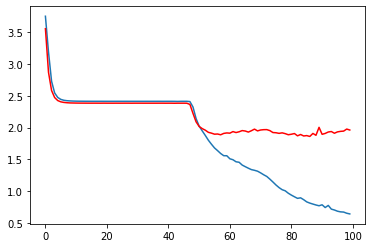

In [38]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'],'r-')
plt.show()

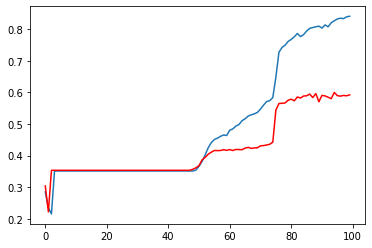

In [40]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'],'r-')
plt.show()

In [20]:
from sklearn.metrics import classification_report

In [24]:
y_train_pred = model.predict(pad_x_train)
y_train_pred[0]

array([2.00710710e-04, 1.65858096e-03, 7.20955431e-05, 9.09307778e-01,
       6.72464371e-02, 6.14979144e-05, 1.48306601e-04, 1.39543365e-04,
       1.88196811e-03, 1.03111983e-04, 2.38617096e-04, 4.97311237e-04,
       9.33193878e-05, 1.84754073e-03, 3.94721465e-05, 5.30757279e-05,
       3.65202036e-03, 1.60050593e-04, 3.70217131e-05, 6.36520749e-03,
       7.12263922e-04, 9.64779523e-04, 2.03316431e-05, 6.41954903e-05,
       4.08841297e-05, 1.54634792e-04, 2.59579974e-04, 2.00153027e-05,
       1.90569888e-04, 3.47953668e-04, 1.06326486e-04, 1.05934632e-05,
       8.72982841e-04, 1.00636687e-04, 7.88613339e-04, 1.05328945e-04,
       7.83955620e-04, 2.94647016e-05, 7.22404147e-05, 4.56386078e-05,
       1.86349323e-04, 3.87882828e-05, 4.90204075e-05, 6.32997544e-05,
       1.01314916e-04, 6.65316984e-05], dtype=float32)

In [25]:
import numpy as np

In [28]:
y_pred = np.argmax(y_train_pred, axis=1)
y_pred.shape

(8982,)

In [41]:
len(y_train)

8982

In [42]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.56      0.61        55
           1       0.46      0.76      0.57       432
           2       0.33      0.69      0.45        74
           3       0.95      0.92      0.93      3159
           4       0.83      0.93      0.88      1949
           5       0.00      0.00      0.00        17
           6       0.82      0.75      0.78        48
           7       1.00      0.06      0.12        16
           8       0.67      0.60      0.63       139
           9       0.48      0.78      0.59       101
          10       0.75      0.73      0.74       124
          11       0.78      0.78      0.78       390
          12       0.00      0.00      0.00        49
          13       0.79      0.74      0.76       172
          14       0.00      0.00      0.00        26
          15       0.36      0.65      0.46        20
          16       0.38      0.01      0.01       444
          17       0.64    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
y_test_pred = model.predict(pad_x_test)

In [44]:
y_pred = np.argmax(y_test_pred, axis=1)

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.15      0.17      0.16        12
           1       0.29      0.46      0.36       105
           2       0.09      0.15      0.11        20
           3       0.92      0.89      0.90       813
           4       0.74      0.80      0.77       474
           5       0.00      0.00      0.00         5
           6       0.25      0.14      0.18        14
           7       0.00      0.00      0.00         3
           8       0.19      0.13      0.16        38
           9       0.05      0.16      0.08        25
          10       0.28      0.23      0.25        30
          11       0.30      0.37      0.34        83
          12       0.00      0.00      0.00        13
          13       0.19      0.16      0.17        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.14      0.01      0.02        99
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
